Pendulum problem using Finite Difference

In [269]:
import math
import numpy
from matplotlib import pyplot as plt


In [270]:
# create dictionaries for velocity and angle
v = dict()
theta = dict()

In [271]:
#constants
g = 980
l = 100
ld = math.sqrt(g/l)
dt = 0.01

In [272]:
#exact analytical solution (only for small angles)
v[0] = math.sqrt((2*g/l)*(1-math.cos(math.radians(10))))
print(v[0]/ld)
print(ld)
initial_angle = 0

def ang(t):
    ang = (v[0] / ld) * math.sin(ld * t) + initial_angle * math.cos(ld * t)
    return ang

0.17431148549531658
3.1304951684997055


In [273]:
#initialize theta

theta[0] = 0


In [274]:
def f(th):
    f = (2*g/l)*(math.cos(math.radians(th))-math.cos(math.radians(10)))
    if f > 0:
        return math.sqrt(f)
    else:
        return - math.sqrt(-f)

In [275]:
#difference equations
i = 0
while(theta[i] < 10):
    theta[i + 1] = theta[i] + f(theta[i]) * dt
    i = i + 1

In [276]:
#copy the values of theta with appropriate shift to map for other quadrants
theta_cycle = list(theta.values())
theta_cycle.extend(reversed(theta_cycle))
theta_cycle_34 = [-i for i in theta_cycle]
theta_cycle.extend(theta_cycle_34)
theta_final = dict(zip(list(range(0,len(theta_cycle))),theta_cycle))


In [277]:
t = [0.01 * i for i in range(0,len(theta_cycle))]
theta_an = [ang(t[i]) for i in range(0,len(theta_cycle))]
theta_an

[0.0,
 0.005455921395846133,
 0.010906496425365647,
 0.016346383961243053,
 0.021770253349051305,
 0.027172789630866508,
 0.03254869875350136,
 0.037892712756253534,
 0.04319959493308563,
 0.04846414496417794,
 0.053681204011825724,
 0.058845659775687266,
 0.0639524515024291,
 0.06899657494485922,
 0.07397308726568888,
 0.07887711188111753,
 0.08370384323949466,
 0.08844855153037581,
 0.09310658731935839,
 0.09767338610415512,
 0.10214447278744108,
 0.10651546606209095,
 0.11078208270450927,
 0.11494014177184694,
 0.11898556869899037,
 0.12291439929130939,
 0.12672278360925068,
 0.13040698974097037,
 0.13396340745930907,
 0.13738855175952544,
 0.14067906627432208,
 0.14383172656281668,
 0.1468434432702362,
 0.14971126515523725,
 0.15243238198188633,
 0.15500412727346632,
 0.15742398092541002,
 0.15968957167480122,
 0.16179867942402232,
 0.16374923741627254,
 0.16553933426082398,
 0.1671672158060318,
 0.16863128685826215,
 0.1699301127450545,
 0.17106242072098585,
 0.17202710121485912,


Text(0, 0.5, 'theta')

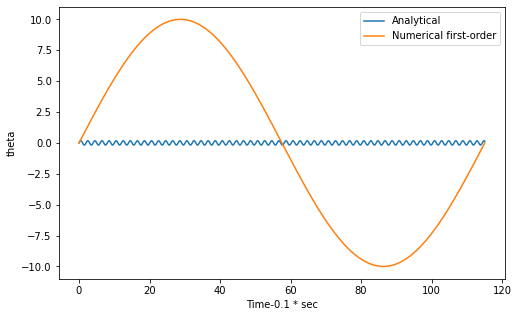

In [278]:
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.plot(t,theta_an, label = "Analytical")
plt.plot(t, theta_cycle,label = "Numerical first-order")
plt.legend()
plt.xlabel('Time-0.1 * sec')
plt.ylabel('theta')